In [23]:
# standard imports
import numpy as np
import folium
import pandas as pd 
from numpy.random import randn
#stats
from scipy import stats
#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [24]:
file = 'atou.csv'
df = pd.read_csv(file, sep=',')

In [25]:
df.describe()

,AddedTicker,Activeticker,Appstarts,BrochureViews,DropOffDateNumber,TopPublisherBrochureClicks,sectorcount,FlagFavoriteRetailer
count,60783.000000,60783.000000,60783.000000,60783.000000,60783.000000,60783.000000,60783.000000,60783.000000
mean,4.018245,3.699620,1.890858,1.440682,14.320024,1.117138,1.228666,0.394041
std,4.674775,4.485426,2.131043,0.496473,19.901426,0.321587,0.433547,0.488648
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6.000000,6.000000,2.000000,2.000000,29.000000,1.000000,1.000000,1.000000
max,57.000000,56.000000,320.000000,2.000000,72.000000,2.000000,2.000000,1.000000


(array([ 35579.,   3406.,   2586.,   2185.,   2148.,   2297.,   2865.,
          3735.,   2389.,   1983.]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.]),
 <a list of 10 Patch objects>)

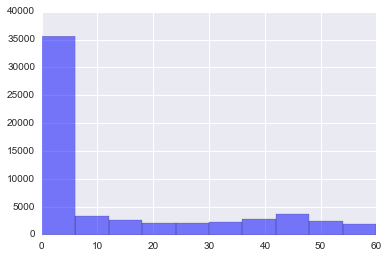

In [26]:
plt.hist(df['DropOffDateNumber'] ,alpha = 0.5, range=(0,60),color = 'blue')

(array([  4.00620000e+04,   1.38600000e+04,   4.42400000e+03,
          1.36500000e+03,   9.57000000e+02,   5.00000000e+01,
          2.90000000e+01,   1.50000000e+01]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 8 Patch objects>)

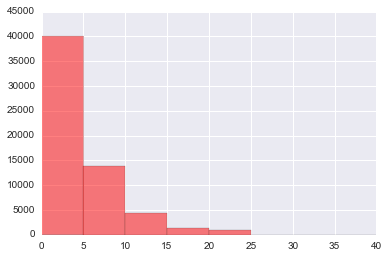

In [27]:
plt.hist(df['AddedTicker'],range=(0,40),histtype='bar',color = 'red',alpha = 0.5,bins = 8)

In [28]:
DataFrame(df['DropOffDateNumber'].groupby((df['FlagFavoriteRetailer'],df['GruppierungBv']))
          .mean().sort_values(ascending=False)).reset_index()

,FlagFavoriteRetailer,GruppierungBv,DropOffDateNumber
0,1,3 Infrequent User,15.261868
1,0,3 Infrequent User,13.707564


In [29]:
DataFrame(df['DropOffDateNumber'].groupby((df['TopPublisher'])).mean().sort_values(ascending=False).head(5)
         ).reset_index()

,TopPublisher,DropOffDateNumber
0,rudolf kramer baumarkt handel gmbh,69
1,holzland tubingen,63
2,raiffeisen bauzentrum buchholz mendt,57
3,omni electronic,55
4,fliesen schnabler gmbh,55


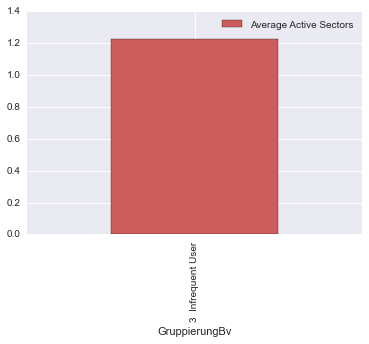

In [30]:
agg = df['sectorcount'].groupby((df['GruppierungBv'])).mean()
agg.plot(x='GruppierungBv', y='sectorcount', kind='bar',legend=True, label = 'Average Active Sectors',color = 'indianred')

In [45]:
data3=DataFrame(df['DropOffDateNumber'].groupby((df['federal_state'])).mean()).reset_index()
state_geo = r'bundeslaender.json'
map = folium.Map(location=[50.810356, 9.925261], zoom_start=3)
data3


,federal_state,DropOffDateNumber
0,baden wurttemberg,14.419317
1,bayern,14.861868
2,berlin,11.871660
3,brandenburg,16.106796
4,bremen,14.266116
5,hamburg,14.549168
6,hessen,14.663132
7,mecklenburg vorpommern,15.727191
8,niedersachsen,14.299630
9,nordrhein westfalen,14.639959


In [46]:
map.geo_json(geo_path=state_geo, data=data3,
             columns=['federal_state', 'DropOffDateNumber'],
             key_on='properties.GEN',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='User Retention')
map  
#.create_map(path='us_states.html')

ValueError: Expecting value: line 1 column 1 (char 0)